In [1]:
from datasets import load_dataset
from datasets import Audio
from transformers import pipeline


In [3]:
from datasets import load_dataset

voxpopuli_croatian = load_dataset("facebook/voxpopuli", "hr", split="test", streaming=True)


In [4]:
sample = {}
for i, example in enumerate(voxpopuli_croatian):
    print(i)
    if i == 2:
        sample = example
        break
    

0
1
2


In [5]:
sample

{'audio_id': '20180206-0900-PLENARY-4-hr_20180206-11:39:05_23',
 'language': 11,
 'audio': {'path': 'test_part_0/20180206-0900-PLENARY-4-hr_20180206-11:39:05_23.wav',
  'array': array([ 6.10351562e-05, -1.83105469e-04,  9.15527344e-05, ...,
          4.57763672e-04,  1.80053711e-03,  1.22070312e-04]),
  'sampling_rate': 16000},
 'raw_text': '',
 'normalized_text': 'nastavlja na temelju ovog europskog projekta koji su izgradili nai oevi utemeljitelji i mnogi politiari i stranke i dravnici i parlamentarci koji su ga gradili zadnjih skoro sedamdesetak godina.',
 'gender': 'male',
 'speaker_id': 'None',
 'is_gold_transcript': True,
 'accent': 'None'}

In [6]:
# Plotting waveform and spectrogram
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T


array = sample["audio"]["array"]
sample_rate = sample["audio"]["sampling_rate"]

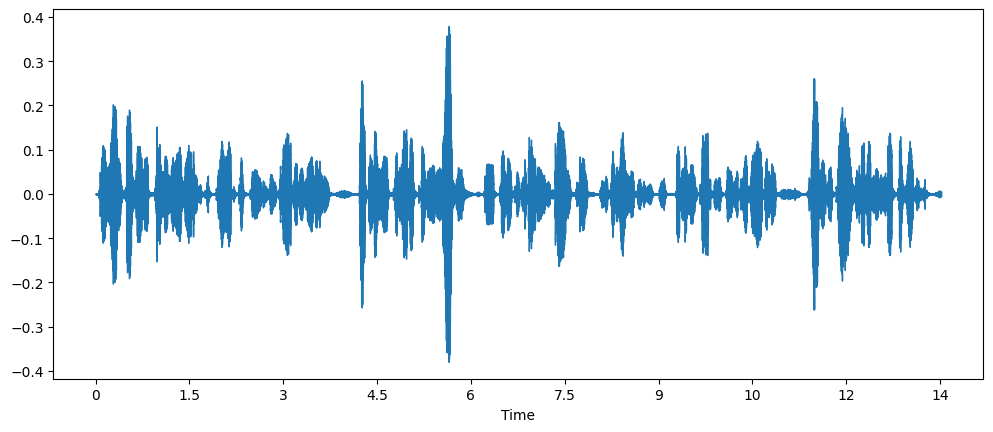

In [7]:
import librosa
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sample_rate)

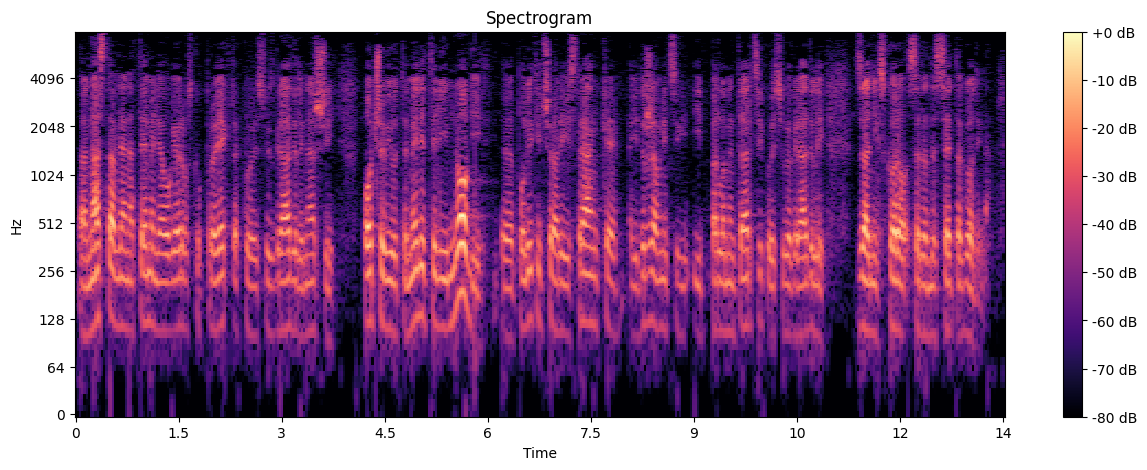

In [8]:
import numpy as np

# Convert waveform to spectrogram
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(array)), ref=np.max)

# Plot the spectrogram for sound_one
plt.figure(figsize=(15, 5))
librosa.display.specshow(D1, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
# plt.savefig("data/spectrogram_sound_one.png")
plt.show()

In [1]:
# Inference on the sample dataset
# transcriber = pipeline("automatic-speech-recognition", model="")

import nemo.collections.asr as nemo_asr

asr_model = nemo_asr.models.EncDecCTCModelBPE.from_pretrained("nvidia/stt_en_conformer_ctc_large")


stt_en_conformer_ctc_large.nemo:   0%|          | 0.00/451M [00:00<?, ?B/s]

[NeMo I 2025-03-10 10:33:36 mixins:176] Tokenizer SentencePieceTokenizer initialized with 128 tokens


[NeMo W 2025-03-10 10:33:36 modelPT:176] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data/NeMo_ASR_SET/English/v2.0/train/tarred_audio_manifest.json
    sample_rate: 16000
    batch_size: 32
    shuffle: true
    num_workers: 8
    pin_memory: true
    use_start_end_token: false
    trim_silence: false
    max_duration: 20.0
    min_duration: 0.1
    shuffle_n: 2048
    is_tarred: true
    tarred_audio_filepaths: /data/NeMo_ASR_SET/English/v2.0/train/audio__OP_0..4095_CL_.tar
    
[NeMo W 2025-03-10 10:33:36 modelPT:183] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath:
    - /data/ASR/LibriSpeech/librispeech_withs

[NeMo I 2025-03-10 10:33:36 features:305] PADDING: 0
[NeMo I 2025-03-10 10:33:38 save_restore_connector:275] Model EncDecCTCModelBPE was successfully restored from /Users/ganeshnagaraja/.cache/huggingface/hub/models--nvidia--stt_en_conformer_ctc_large/snapshots/5f18b90411b9fdfc9b52b8caf636f204491afb01/stt_en_conformer_ctc_large.nemo.


In [9]:
output = asr_model.transcribe(array)

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s][NeMo W 2025-03-10 10:37:43 audio_preprocessing:97] AudioPreprocessor received an input signal of dtype torch.float64, rather than torch.float32. In sweeps across multiple datasets, we have found that the preprocessor is not robust to low precision  mathematics. As such, it runs in float32. Your input will be cast to float32, but this is not necessarily enough to recovery full accuracy. For example, simply casting input_signal from torch.float32 to torch.bfloat16, then back to torch.float32 before running AudioPreprocessor causes drops in absolute WER of up to 0.1%. torch.bfloat16 simply does not have enough mantissa bits to represent enough values in the range [-1.0,+1.0] correctly.
[NeMo W 2025-03-10 10:37:45 deprecated:65] Function ``_transcribe_output_processing`` is deprecated. The return type of args will be updated in the upcoming release to ensure a consistent output             format across all decoder types, such that a Hypo

In [11]:
output

['astaviana tmelygerovsko projectacs with gradali nashi otevu the medit nogi politiciary strankvici parliament arzuo gradali zaniskorro sed and the sertagordina']

In [ ]:
# convert array to wav file
import soundfile as sf
sf.write("sample_3_hr.wav", array, sample_rate)

# nastavlja na temelju ovog europskog projekta koji su izgradili nai oevi utemeljitelji i mnogi politiari i stranke i dravnici i parlamentarci koji su ga gradili zadnjih skoro sedamdesetak godina

In [ ]:
# import torch
# from datasets import load_dataset
# from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline

# device = "cuda:0" if torch.cuda.is_available() else "cpu"
# torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

# # Load model
# model_name_or_path = "bofenghuang/whisper-large-v3-french-distil-dec16"
# processor = AutoProcessor.from_pretrained(model_name_or_path)
# model = AutoModelForSpeechSeq2Seq.from_pretrained(
#     model_name_or_path,
#     torch_dtype=torch_dtype,
#     low_cpu_mem_usage=True,
# )
# model.to(device)

# # Init pipeline
# pipe = pipeline(
#     "automatic-speech-recognition",
#     model=model,
#     feature_extractor=processor.feature_extractor,
#     tokenizer=processor.tokenizer,
#     torch_dtype=torch_dtype,
#     device=device,
#     # chunk_length_s=30,  # for long-form transcription
#     max_new_tokens=128,
# )

# # Example audio
# # dataset = load_dataset("bofenghuang/asr-dummy", "fr", split="test")
# # sample = dataset[0]["audio"]

# # Run pipeline
# # result = pipe(sample)
# # print(result["text"])
